# Documentation MMesh
MMesh creates, read and write meshes for Marine Energy Resource Assessment Canada.

MMesh has a default object [MESH](doc_MESH.ipynb) to read, write and plot meshes.

## Create mesh
A mesh can only be created from a closed polygon using shapely.geoemtry.Polygon. A Density Field from mshapely.DF is required to control the lenght of the elements.

### Polygon.msh(path,df)

In [1]:
from mmesh import msh
print(msh.__doc__)


  Creates mesh using gmsh using Polygon boundaries and density field (DF).
  It's a two step process:
  1. Creates a geo file (text file), createGEO()
  2. Creates a msh file using gmsh, createMSH()
  
  Parameters
  ----------
  path:str
  df:Density field,mshapely.DF
  


### Examples

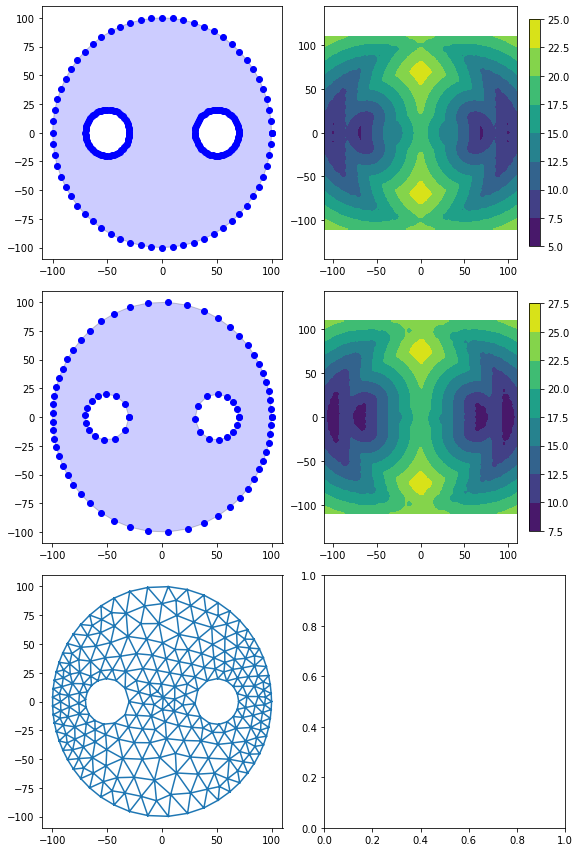

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon
from mshapely import DF

# Prepare figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
fig.tight_layout()

# Create polygon
polygon = Point((0,0)).buffer(100)
hole1 = Point((-50,0)).buffer(20)
hole2 = Point((50,0)).buffer(20)
polygon = Polygon(polygon.exterior,[hole1.exterior.coords[::-1],hole2.exterior.coords[::-1]])
polygon.plot(axe=axes[0][0],showPoints=True,polygonStyle={"alpha":0.2})

# Calculate interior distance and calculate density field
distance=polygon.inearest(maxDistance=100,angle=90)
distance[:,2]=DF.getD_l(1,1.2,distance[:,2])
density = np.column_stack((distance,np.ones(len(distance))*1.2))
df=DF(density,minDensity=1,maxDensity=100)
df.plot(axe=axes[0][1],fig=fig)

# Resample polygon
polygon=polygon.dresample(df)
polygon.plot(axe=axes[1][0],showPoints=True,polygonStyle={"alpha":0.2})

# Recaculate interior distance and calculte density field based on the new points
distance=polygon.inearest(maxDistance=100,angle=90)
distance[:,2]=DF.getD_l(1,1.2,distance[:,2],1)
density = np.column_stack((distance,np.ones(len(distance))*1.2))
df=DF(density,minDensity=1,maxDensity=100)
df.plot(axe=axes[1][1],fig=fig)

polygon.msh("test.msh",df).plot(axe=axes[2][0])
pass